/tmp/ipykernel_13/1762856335.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  police_df["search_conducted"].fillna(False, inplace=True)
/tmp/ipykernel_13/1762856335.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

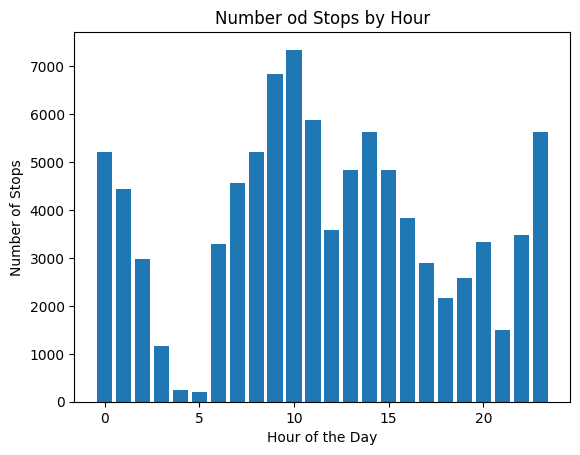

Most common stop hour:  10
Number of stops at that hour: 7350
Driver Gender Percentages:
Man: %68.56
Woman: %25.63
Unknown: %5.82

Stop outcomes and their percantages:
stop_outcome
Citation            83.938479
Unknown              5.813104
Warning              5.770593
Arrest Driver        2.802455
N/D                  0.643115
No Action            0.642025
Arrest Passenger     0.390229
Name: count, dtype: float64
Number of stops with Citation: 77006
Percentage of stops with Citation: 83.94%
Arrested counts by race and gender:
 driver_race  driver_gender
Asian        F                  11
             M                  30
Black        F                 134
             M                 571
Hispanic     F                  80
             M                 486
Other        M                   2
White        F                 371
             M                1244
dtype: int64
Arrest rate(%) by race and gender:
 driver_race  driver_gender
Asian        F                2.144250
        

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


police_df = pd.read_csv("/kaggle/input/police/police.csv")



police_df["search_conducted"].fillna(False, inplace=True)
police_df["is_arrested"].fillna(False, inplace=True)
cols_to_fill = ["driver_gender", "driver_race", "violation", "stop_outcome", "stop_duration","driver_age"]
for col in cols_to_fill:
    police_df[col].fillna("Unknown", inplace=True)

police_df["stop_datetime"] = pd.to_datetime(police_df["stop_date"] + ' ' + police_df["stop_time"])
police_df.drop(["stop_date","stop_time","county_name","search_type","violation_raw","driver_age_raw"], axis=1, inplace=True)

stop_by_hour = police_df["stop_datetime"].dt.hour.value_counts().sort_index()
plt.bar(stop_by_hour.index, stop_by_hour.values)
plt.title("Number od Stops by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Stops")
plt.show()
most_common_hour = stop_by_hour.idxmax()
most_common_count = stop_by_hour.max()
print("Most common stop hour: ", most_common_hour)
print("Number of stops at that hour:", most_common_count)


gender_counts = police_df["driver_gender"].value_counts()
gender_percentages = (gender_counts  /gender_counts.sum()) * 100
print("Driver Gender Percentages:")
for gender,percentage in gender_percentages.items():
    if gender == "M":
        label = "Man"
    elif gender == "F":
        label = "Woman"
    else:
        label = "Unknown"
    print(f"{label}: %{percentage:.2f}")


stoping_reason = police_df["stop_outcome"].value_counts()
total_stops = stoping_reason.sum()
stoping_percentages = (stoping_reason / total_stops) * 100
print("\nStop outcomes and their percantages:")
print(stoping_percentages)
citation_count = (police_df["stop_outcome"] == "Citation").sum()
print("Number of stops with Citation:",citation_count)
citation_percentage = citation_count / total_stops *100
print(f"Percentage of stops with Citation: {citation_percentage:.2f}%")


arrested = police_df[police_df["is_arrested"] ==  True]
arrested_count = arrested.groupby(["driver_race", "driver_gender"]).size()
print("Arrested counts by race and gender:\n", arrested_count)
total_stops = police_df.groupby(["driver_race", "driver_gender"]).size()
arrest_rate = (arrested_count / total_stops) * 100
print("Arrest rate(%) by race and gender:\n", arrest_rate)
arrest_rate_sorted = arrest_rate.sort_values(ascending=False)
print("Sorted arrest rates(%):\n ", arrest_rate_sorted)